<a href="https://colab.research.google.com/github/mehrahmad9033/DataScience/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Loading Data
data=np.genfromtxt('https://hastie.su.domains/Papers/LARS/diabetes.data',delimiter='\t', dtype=None, names=True, encoding=None)
df=pd.DataFrame(data)

In [3]:
 #Analyzing Data Quality
print('*********    Describe    ****************')
print(df.describe())
print('_______________________________')
print('**********    Shape    ***************')
print(df.shape)
print('_______________________________')
print('**********    Null Sum    ***************')
print(df.isnull().sum())
print('_______________________________')
print('**********   Duplicate Rows    ***************')
print(df.duplicated().sum())


*********    Describe    ****************
              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.2

outlier: ( AGE ) 0


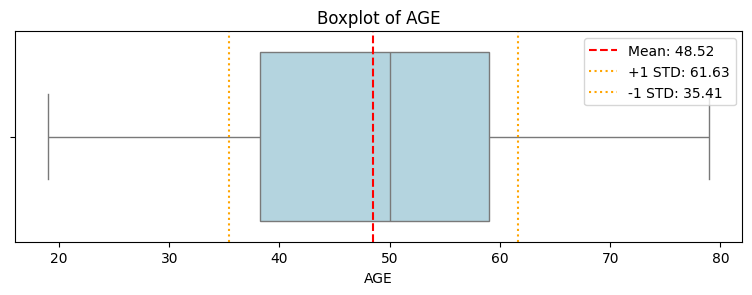

outlier: ( SEX ) 0


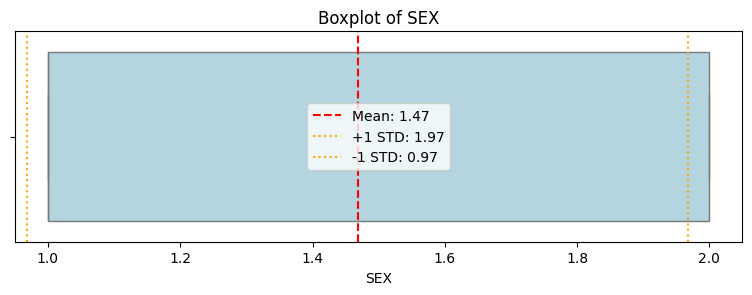

outlier: ( BMI ) 3


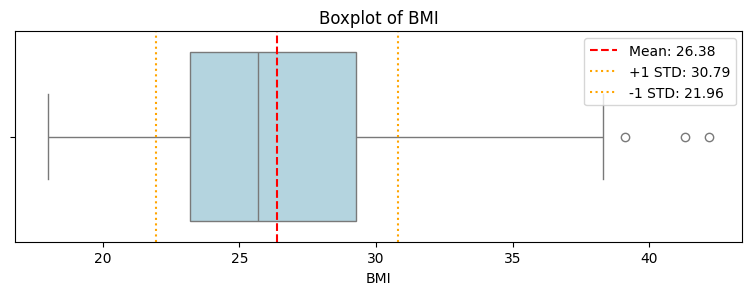

outlier: ( BP ) 0


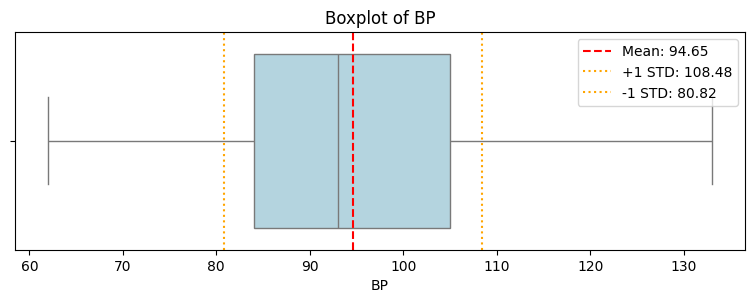

outlier: ( S1 ) 8


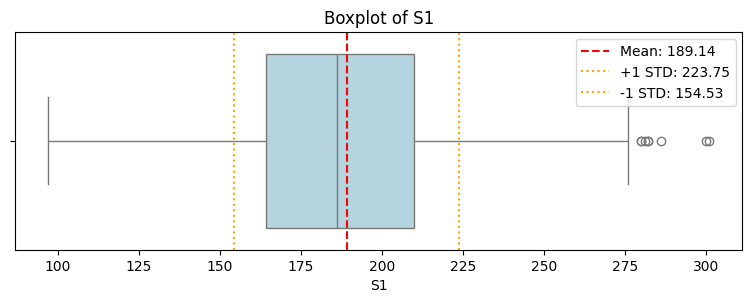

outlier: ( S2 ) 7


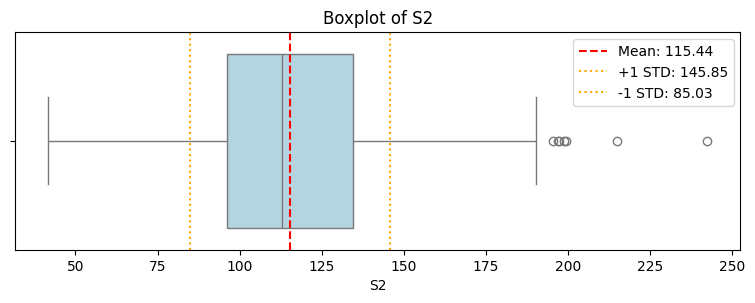

outlier: ( S3 ) 7


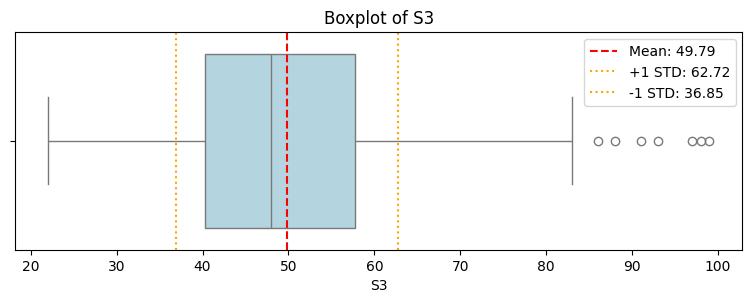

outlier: ( S4 ) 2


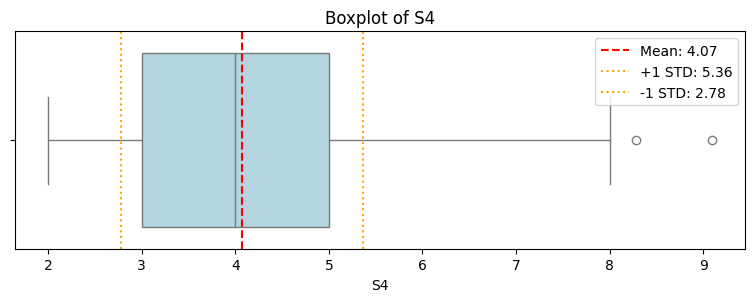

outlier: ( S5 ) 4


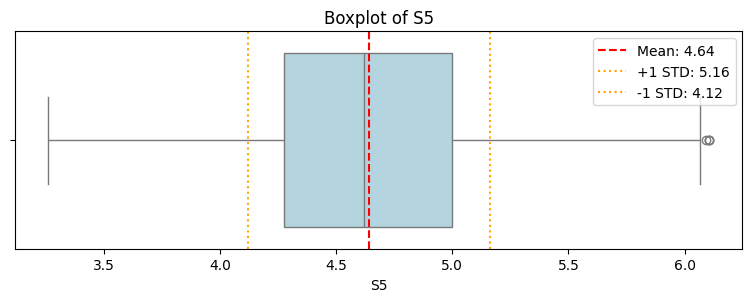

outlier: ( S6 ) 9


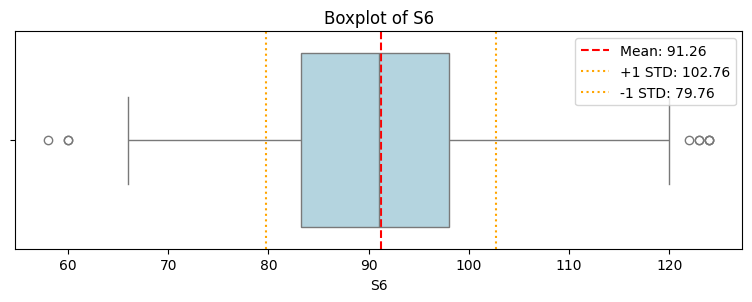

outlier: ( Y ) 0


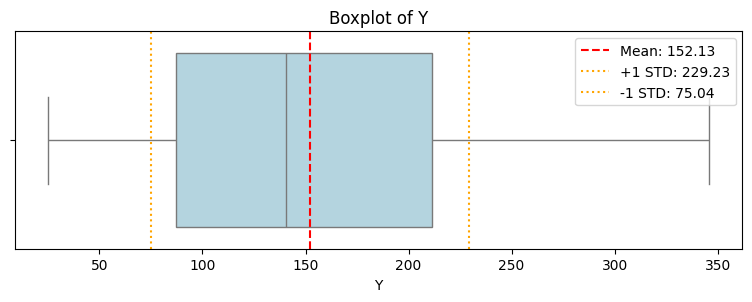

In [4]:
# Outliers
outlier_quantiles={}
outlier_zscore={}
i=0
for column in df.columns:
    i+=1
    Q1=df[column].quantile(0.25)
    Q2=df[column].quantile(0.75)
    Q3=Q2-Q1
    #print('---> ',column)
    #print('Q1: ',Q1,'Q2: ',Q2,'Q3: ',Q3)
    lower_b=Q1-1.5*Q3
    upper_b=Q2+1.5*Q3
    #print(df[column])
    #print('Lower Bound: ',lower_b,'Upper Bound: ',upper_b)

    print('outlier: (',column,')', df[(df[column]<lower_b) | (df[column]>upper_b)].shape[0])
    outlier_quantiles[column]=df[(df[column]<lower_b) | (df[column]>upper_b)].shape[0];

    outlier_zscore[column]=np.abs(stats.zscore(df[column]))
    # for col, count in outlier_zscore.items():
    #     print(f"{col}: {count} outliers")

    plt.figure(figsize=(30,8))
    plt.subplot(3, 4, i + 1)
    mean_value = df[column].mean()
    std_value = df[column].std()
    sn.boxplot(x=df[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(mean_value + std_value, color='orange', linestyle=':', label=f'+1 STD: {mean_value + std_value:.2f}')
    plt.axvline(mean_value - std_value, color='orange', linestyle=':', label=f'-1 STD: {mean_value - std_value:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()




In [5]:
# Data Transformation
print(df.dtypes)
category_columns=df.select_dtypes(include=['object']).columns
numeric_columns=df.select_dtypes(include=['int64','float64']).columns
print(category_columns)
print(numeric_columns)

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object
Index([], dtype='object')
Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')


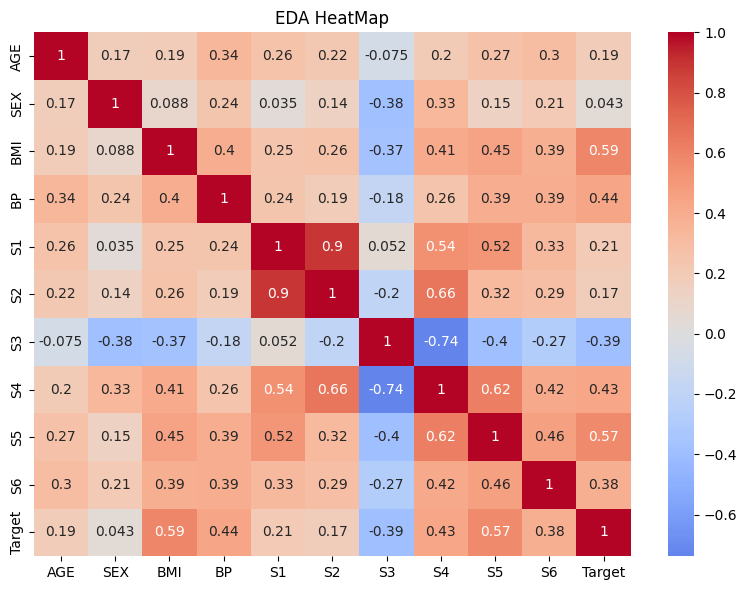

In [6]:
# EDA (Exploratory data analysis)
df=df.rename(columns={'Y':'Target'})
cor_matrix=df.corr()
plt.figure(figsize=(8,6))
sn.heatmap(cor_matrix,annot=True,cmap='coolwarm',center=0)
plt.title('EDA HeatMap')
plt.tight_layout()
plt.show()





In [7]:
#Target corelations
target_correlations = cor_matrix['Target'].abs().sort_values(ascending=False)
print('Important Featues for target corelations')
print(target_correlations)

Important Featues for target corelations
Target    1.000000
BMI       0.586450
S5        0.565883
BP        0.441482
S4        0.430453
S3        0.394789
S6        0.382483
S1        0.212022
AGE       0.187889
S2        0.174054
SEX       0.043062
Name: Target, dtype: float64


DataSet Sample is small :  {442}
********* Following are highly corelated items. Perform PCA or removal techniques **********
S1 - S2: 0.897
S2 - S1: 0.897
S3 - S4: -0.738
S4 - S3: -0.738
*********    Variance Inflation Factor    ****************
   Feature         VIF
0      AGE   17.877324
1      SEX   12.733175
2      BMI   61.936257
3       BP   72.539568
4       S1  596.412773
5       S2  252.695859
6       S3   60.533240
7       S4   81.532998
8       S5  277.401919
9       S6   94.019594
10  Target    9.618009


<ipython-input-9-9038eef689f0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x="Feature", y="VIF", data=vif_data, palette="coolwarm")


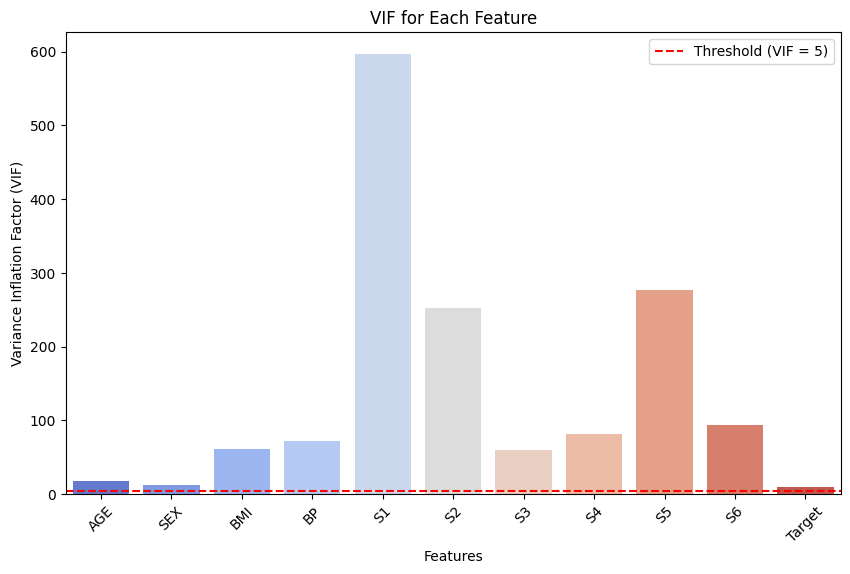

In [9]:
# Limitations of Data
print("DataSet Sample is small : ",{len(df)})
print("********* Following are highly corelated items. Perform PCA or removal techniques **********")
correlation_matrix = df.corr()
high_corr = np.where(np.abs(correlation_matrix) > 0.7)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) for x, y in zip(*high_corr) if x != y]
for feat1, feat2, corr in high_corr:
    print(f"{feat1} - {feat2}: {corr:.3f}")

print('*********    Variance Inflation Factor    ****************')
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)

plt.figure(figsize=(10, 6))
sn.barplot(x="Feature", y="VIF", data=vif_data, palette="coolwarm")
plt.axhline(y=5, color='red', linestyle='--', label="Threshold (VIF = 5)")
plt.xlabel("Features")
plt.ylabel("Variance Inflation Factor (VIF)")
plt.title("VIF for Each Feature")
plt.xticks(rotation=45)
plt.legend()
plt.show()
